# Домашнее задание 1

In [17]:
!pip3 install torch torchvision

In [18]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [19]:
import torch
import random
import numpy as np
import torch
import torchvision
from torch import nn 
from torch import optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torchvision
import torch.utils

In [20]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

## 1.	Добиться вразумительного результата от модели, собранной на занятии (3 угаданные картинки из 4 предложенных на семинаре). Варианты изменений:

a.	изменение слоёв и их количества;

b.	изменение метода оптимизации; 

c.	изменение процесса обучения; 

d.	для продвинутых: преобразование данных.


In [21]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [22]:
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)


image, label = train_dataset[0]
print (image.size())
print (classes[label])

Files already downloaded and verified
torch.Size([3, 32, 32])
frog


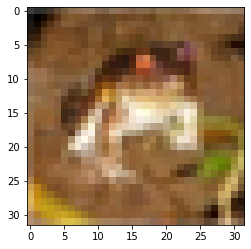

In [23]:
plt.imshow(image.permute(1, 2, 0).numpy())

In [24]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [25]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4,
                                         shuffle=False)

Files already downloaded and verified


In [26]:
device = 'cpu'

In [27]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net().to(device)

In [28]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [29]:
for epoch in range(10):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:   
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

[1,     1] loss: 0.001
[1,   301] loss: 0.346
[1,   601] loss: 0.345
[2,     1] loss: 0.001
[2,   301] loss: 0.345
[2,   601] loss: 0.345
[3,     1] loss: 0.001
[3,   301] loss: 0.343
[3,   601] loss: 0.330
[4,     1] loss: 0.001
[4,   301] loss: 0.306
[4,   601] loss: 0.300
[5,     1] loss: 0.001
[5,   301] loss: 0.294
[5,   601] loss: 0.289
[6,     1] loss: 0.001
[6,   301] loss: 0.281
[6,   601] loss: 0.276
[7,     1] loss: 0.001
[7,   301] loss: 0.267
[7,   601] loss: 0.260
[8,     1] loss: 0.001
[8,   301] loss: 0.250
[8,   601] loss: 0.246
[9,     1] loss: 0.001
[9,   301] loss: 0.237
[9,   601] loss: 0.234
[10,     1] loss: 0.001
[10,   301] loss: 0.228
[10,   601] loss: 0.224
Training is finished!


In [30]:
PATH = './cifar_net_version_test_intro.pth'
torch.save(net.state_dict(), PATH)

In [31]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [32]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

GroundTruth:    cat  ship  ship plane


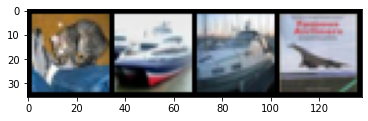

In [33]:
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [34]:
class Net_layer(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        # x = F.relu(self.fc2(x))
        # x = F.relu(self.fc3(x))
        x = self.fc2(x)
        return x

In [35]:
def training_model(model, optimizer, train_data, test_loss_history, num_epoch=10, criterion = nn.CrossEntropyLoss()):
    for epoch in range(num_epoch):  
        running_loss = 0.0
        for i, data in enumerate(train_data, 0):
            inputs, labels = data
            # обнуляем градиент
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # выводим статистику о процессе обучения
            running_loss += loss.item()
            if i % 300 == 299:   
                loss = running_loss / 2000
                test_loss_history.append(loss)
                print('[%d, %5d] loss: %.3f' %
                     (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0

    print('Training is finished!')

In [36]:
model = Net_layer().to('cpu')
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
test_loss_history = []
training_model(model, optimizer, train_loader, test_loss_history, 10)

[1,   300] loss: 0.345
[1,   600] loss: 0.341
[2,   300] loss: 0.316
[2,   600] loss: 0.300
[3,   300] loss: 0.289
[3,   600] loss: 0.279
[4,   300] loss: 0.261
[4,   600] loss: 0.252
[5,   300] loss: 0.241
[5,   600] loss: 0.239
[6,   300] loss: 0.230
[6,   600] loss: 0.227
[7,   300] loss: 0.222
[7,   600] loss: 0.220
[8,   300] loss: 0.216
[8,   600] loss: 0.215
[9,   300] loss: 0.210
[9,   600] loss: 0.211
[10,   300] loss: 0.207
[10,   600] loss: 0.206
Training is finished!


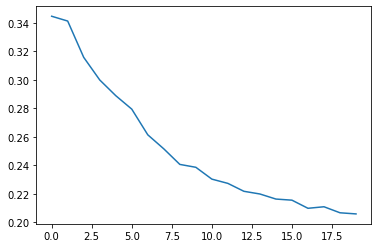

In [37]:
plt.plot(test_loss_history);

In [38]:
model = Net().to('cpu')
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
test_loss_history = []
training_model(model, optimizer, train_loader, test_loss_history, 10)

[1,   300] loss: 0.345
[1,   600] loss: 0.345
[2,   300] loss: 0.345
[2,   600] loss: 0.344
[3,   300] loss: 0.338
[3,   600] loss: 0.329
[4,   300] loss: 0.309
[4,   600] loss: 0.298
[5,   300] loss: 0.290
[5,   600] loss: 0.282
[6,   300] loss: 0.273
[6,   600] loss: 0.266
[7,   300] loss: 0.252
[7,   600] loss: 0.249
[8,   300] loss: 0.241
[8,   600] loss: 0.240
[9,   300] loss: 0.233
[9,   600] loss: 0.230
[10,   300] loss: 0.225
[10,   600] loss: 0.224
Training is finished!


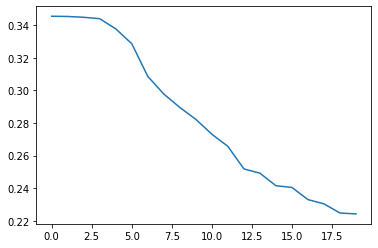

In [39]:
plt.plot(test_loss_history);

In [40]:
model = Net_layer().to('cpu')
optimizer = optim.Adam(model.parameters(), lr=0.001)
test_loss_history = []
training_model(model, optimizer, train_loader, test_loss_history, 10)

[1,   300] loss: 0.291
[1,   600] loss: 0.252
[2,   300] loss: 0.229
[2,   600] loss: 0.218
[3,   300] loss: 0.210
[3,   600] loss: 0.203
[4,   300] loss: 0.194
[4,   600] loss: 0.193
[5,   300] loss: 0.186
[5,   600] loss: 0.182
[6,   300] loss: 0.178
[6,   600] loss: 0.179
[7,   300] loss: 0.172
[7,   600] loss: 0.169
[8,   300] loss: 0.165
[8,   600] loss: 0.164
[9,   300] loss: 0.158
[9,   600] loss: 0.162
[10,   300] loss: 0.156
[10,   600] loss: 0.155
Training is finished!


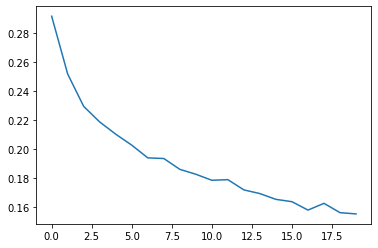

In [41]:
plt.plot(test_loss_history);

In [42]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [43]:
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                             train=True,  
                                             transform=transform, 
                                             download=False)

In [44]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64, 
                                           shuffle=True)

In [45]:
model = Net().to('cpu')
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
test_loss_history = []
training_model(model, optimizer, train_loader, test_loss_history, 10)

[1,   300] loss: 0.346
[1,   600] loss: 0.345
[2,   300] loss: 0.338
[2,   600] loss: 0.324
[3,   300] loss: 0.301
[3,   600] loss: 0.290
[4,   300] loss: 0.277
[4,   600] loss: 0.267
[5,   300] loss: 0.253
[5,   600] loss: 0.248
[6,   300] loss: 0.239
[6,   600] loss: 0.231
[7,   300] loss: 0.226
[7,   600] loss: 0.223
[8,   300] loss: 0.217
[8,   600] loss: 0.215
[9,   300] loss: 0.211
[9,   600] loss: 0.209
[10,   300] loss: 0.204
[10,   600] loss: 0.205
Training is finished!


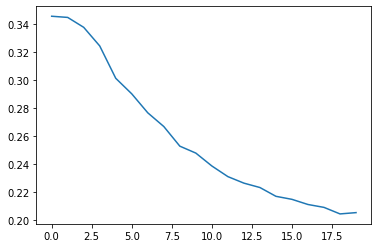

In [46]:
plt.plot(test_loss_history);

## 2.	Взять часть, где мы делали один шаг обучения, и обернуть его в цикл по схеме, как обучали модель в конце занятия.

In [60]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [61]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1000,
                                          shuffle=True, num_workers=12)

Files already downloaded and verified


In [62]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=125,
                                         shuffle=False, num_workers=12)

Files already downloaded and verified


In [63]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [64]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

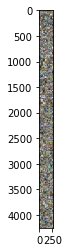

In [65]:
imshow(torchvision.utils.make_grid(images))

In [66]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 60, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(60, 120, 3)
        self.fc1 = nn.Linear(120 * 6 * 6, 2048)
        self.fc2 = nn.Linear(2048, 1024)
        self.fc3 = nn.Linear(1024, 512)
        self.fc4 = nn.Linear(512, 128)
        self.fc5 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # print(x.shape)
        x = x.view(-1, 120 * 6 * 6)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x

In [67]:
device = "cpu" # torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [68]:
net = Net()
if device == "cuda:0":
    net.to(device)

In [69]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)

In [70]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        if device == "cpu":
            inputs, labels = data
        elif device == "cuda:0":
            inputs, labels = data[0].to(device), data[1].to(device)
        else:
            print("DEVICE ERROR")
            break

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 49:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 49))
            running_loss = 0.0
print('Finished Training')

[1,    50] loss: 2.095
[2,    50] loss: 1.755
[3,    50] loss: 1.621
[4,    50] loss: 1.533
[5,    50] loss: 1.472
[6,    50] loss: 1.423
[7,    50] loss: 1.383
[8,    50] loss: 1.340
[9,    50] loss: 1.309
[10,    50] loss: 1.273
Finished Training


In [71]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        if device == "cpu":
            images, labels = data
        elif device == "cuda:0":
            images, labels = data[0].to(device), data[1].to(device)
        else:
            print("DEVICE ERROR")
            break
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


In [72]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        if device == "cpu":
            images, labels = data
        elif device == "cuda:0":
            images, labels = data[0].to(device), data[1].to(device)
        else:
            print("DEVICE ERROR")
            break
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 50 %
Accuracy of   car : 74 %
Accuracy of  bird : 30 %
Accuracy of   cat : 48 %
Accuracy of  deer : 28 %
Accuracy of   dog : 54 %
Accuracy of  frog : 65 %
Accuracy of horse : 57 %
Accuracy of  ship : 76 %
Accuracy of truck : 52 %


In [73]:
torch.save(net.state_dict(), "./cifar_net.pth")

3.	Переписать эту программу на PyTorch: 

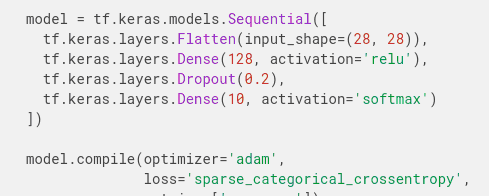

Не забудьте про реализацию функции forward! 

In [47]:
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])

In [48]:
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=120,
                                          shuffle=True, num_workers=12)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [49]:
trainset.data.size()

torch.Size([60000, 28, 28])

In [50]:
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=120,
                                         shuffle=True, num_workers=12)

In [51]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


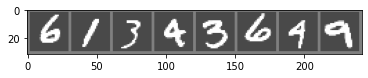

tensor([6, 1, 3, 4, 3, 6, 4, 9])


In [52]:
imshow(torchvision.utils.make_grid(images[:8,:]))
print(labels[:8])

In [53]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten(1, -1)
        self.linear1 = nn.Linear(28*28, 128)
        self.linear2 = nn.Linear(128, 10)
        

    def forward(self, x):
        x = self.flatten(x)
        x = self.linear1(x)
        x = F.relu(x)
        x = F.dropout(x, 0.2)
        x = self.linear2(x)
        x = F.softmax(x)
        return x

In [54]:
model = Net()
if device == "cuda:0":
    model.to(device)

In [55]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [56]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        if device == "cpu":
            inputs, labels = data
        elif device == "cuda:0":
            inputs, labels = data[0].to(device), data[1].to(device)
        else:
            print("DEVICE ERROR")
            break

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 499))
            running_loss = 0.0
print('Finished Training')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


[1,   500] loss: 1.821
[2,   500] loss: 1.616
Finished Training


In [57]:
for i, data in enumerate(testloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        if device == "cpu":
            inputs, labels = data
        elif device == "cuda:0":
            inputs, labels = data[0].to(device), data[1].to(device)
        break

In [58]:
y_pred = model(inputs).cpu().detach().numpy()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


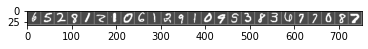

y:      [6 5 2 8 1 2 1 0 6 1 2 9 1 0 9 5 3 8 3 6 7 7 0 8 7]
y_pred: [4 5 2 9 1 7 8 0 6 1 2 9 1 0 9 5 3 8 3 6 7 7 0 8 7]


In [59]:
imshow(torchvision.utils.make_grid(inputs.cpu()[:25,:], 25))
print("y:     ",labels.cpu().numpy()[:25])
print("y_pred:", y_pred.argmax(1)[:25])